In [1]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para leer archivos
import geopandas as gpd # Para hacer cosas geográficas
import seaborn as sns # Para hacer plots lindos
import networkx as nx # Construcción de la red en NetworkX
import scipy

In [2]:
from template_funciones import *
from template_funciones_2 import *

# Preambulo

En esta sección cargamos los datos y los visualizamos. También construimos la matriz de adyacencia de la red de museos.

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [3]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

<Axes: >

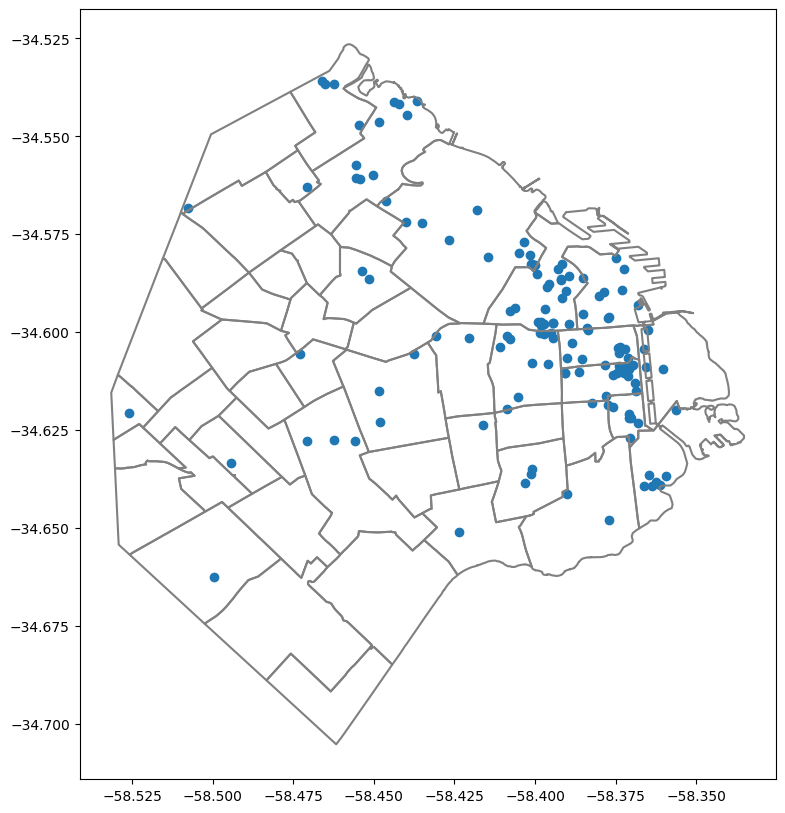

In [4]:
# Armamos el gráfico para visualizar los museos
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray',ax=ax)
museos.plot(ax=ax)

## Cálculo de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [5]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [6]:
m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [7]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

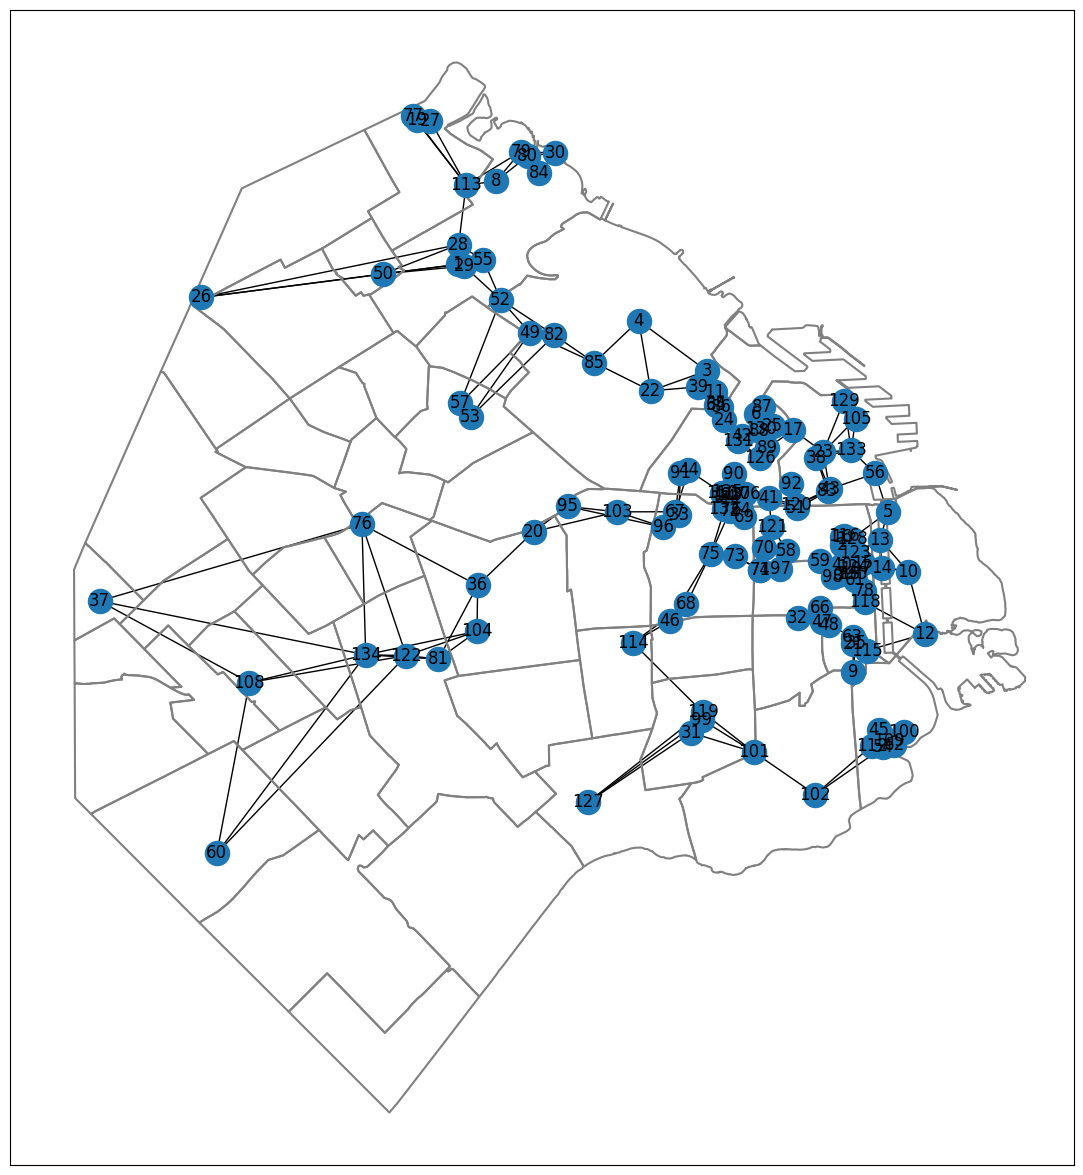

In [8]:
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

# Resolución del TP

Aquí empieza la aventura... ¡diviertanse y consulten lo que necesiten!

## Punto 1:

Inicialmente, contamos con la siguiente ecuación:

$\mathbf{p} = (1 - \alpha) \ C \ \mathbf{p} + \frac{\alpha}{N} \mathbf{1}$

Nuestro objetivo es poder demostrar que el vector de rankings **p** es solución de la siguiente ecuación:

$M \ \mathbf{p} = \mathbf{b}$

Teniendo a:

$M = \frac{N}{\alpha} \left( I - (1 - \alpha) C \right)$ \
$\mathbf{b} = 1$ \
$ α \neq 0 $ pues de lo contrario $M$ se indefine ($\text{Observación}:$
si $α = 0 → p$ es solución de $p = Cp$)

Para ello, realizamos los siguientes pasos, logrando así llegar el resultado deseado:



$\mathbf{p} =(1−α) C \mathbf{p} \ + \ \frac{α}{N} \mathbf{1}$   &nbsp; &nbsp; partimos de esta ecuación.

\

$\mathbf{p} - (1−α) C \mathbf{p} \ = \ \frac{α}{N} \mathbf{1}$ &nbsp; &nbsp; pasamos lo que involucra a $p$ del lado izquierdo de la igualdad.

\

$ (I -(1−α) C ) \mathbf{p} \ = \ \frac{α}{N} \mathbf{1}$ &nbsp; &nbsp; sacamos de factor común $p$ (Nota: $I p \ = p$).


\

Finalmente, $\ \mathbf{p} \ = \frac{\alpha}{N}(I -(1−α) C )^{-1} \ \mathbf{1}$  &nbsp; &nbsp; (al ser escalar, no importa si $\frac{\alpha}{N}$ está al principio o al final).

\

Notar que el resultado tendrá soluciÓn Únicamente si $(I -(1−α) C )$ es inversible. De ahora en adelante, lo asumiremos.

Entonces, reemplazando en la ecuaciÓn $M \mathbf{p} = \mathbf{b} \ $ nos queda que:

$(\frac{N}{\alpha} \left( I - (1 - \alpha) C \right))\cdot \frac{\alpha}{N}(I -(1−α) C )^{-1} \ \mathbf{1} = \mathbf{b}$

\

$(\frac{N}{\alpha} * \frac{\alpha}{N})\left( I - (1 - \alpha) C \right))\cdot (I -(1−α) C )^{-1} \ \mathbf{1} = \mathbf{b}$

\

$ I \ \mathbf{1} = \mathbf{b}$ &nbsp; &nbsp; pues &nbsp; $\forall \ M \in \mathbb{K}^{n*n} \ \ \text{inversible} \  → MM^{-1} = I$

\

$\mathbf{1} = \mathbf{b}$ &nbsp; como se querÍa probar.

\

$\hspace{15cm}  \huge\boxtimes $

Inicialmente, contamos con la siguiente ecuación:

$\mathbf{p} = (1 - \alpha) \ C \ \mathbf{p} + \frac{\alpha}{N} \mathbf{1}$

Nuestro objetivo es poder demostrar que el vector de rankings **p** es solución de la siguiente ecuación:

$M \ \mathbf{p} = \mathbf{b}$

Teniendo a:

$M = \frac{N}{\alpha} \left( I - (1 - \alpha) C \right)$ \
$\mathbf{b} = 1$ \
$ α \neq 0 $ pues de lo contrario $M$ se indefine ($\text{Observación}:$
si $α = 0 → p$ es solución de $p = Cp$)

Para ello, realizamos los siguientes pasos, logrando así llegar el resultado deseado:

\

$\mathbf{p} =(1−α) C \mathbf{p} \ + \ \frac{α}{N} \mathbf{1}$   &nbsp; &nbsp; partimos de esta ecuación.

\

$\mathbf{p} - (1−α) C \mathbf{p} \ = \ \frac{α}{N} \mathbf{1}$ &nbsp; &nbsp; pasamos lo que involucra a $p$ del lado izquierdo de la igualdad.

\

$ (I -(1−α) C ) \mathbf{p} \ = \ \frac{α}{N} \mathbf{1}$ &nbsp; &nbsp; sacamos de factor común $p$ (Nota: $I p \ = p$).

\

$ (I -(1−α) C ) \mathbf{p} \  \frac{N}{α} = \mathbf{1}$ &nbsp; &nbsp; pasamos $\frac{α}{N}$ del otro lado de la igualdad (Nota: $\frac{α}{N}$ es un escalar, &nbsp;$ α \neq 0 $ ).

\

$ \frac{N}{α} \ (I -(1−α) C ) \mathbf{p} \ = \mathbf{1}$  &nbsp; &nbsp; al ser escalar, no importa si $\frac{N}{α}$ está al principio o al final.

\

$ M \mathbf{p} \ = \ \mathbf{1}$ &nbsp; &nbsp; lo que acompañaba a $\mathbf{p}$ es lo que, previamente, se definió como $M$.

\

$M \mathbf{p} \ = \ \mathbf{b} $ &nbsp; &nbsp; pues $\mathbf{b}$ estaba definida como $\mathbf{1}$, quedando demostrado que $\mathbf{p}$ es solución de lo pedido.


\


 $\hspace{15cm}  \huge\boxtimes $

## Punto 2:


Para que exista una única solución a la ecuación del punto anterior, debe ocurrir que el sistema sea **SCD (Sistema Compatible Determinado)**.
Teniendo un sistema genérico $Mx = b$, esto ocurre sí y solo sí $M$ es cuadrada ($M \in \mathbb{K}^{n \times n}) $ con $det(M) \neq 0 $ , lo cual sucede únicamente si $M$ es inversible (se puede pensar como que el rango de la matriz pre y post triangulación es el mismo, esto es, $\ \text{rk}(M) = n$). En definitiva, llegamos a que:\
$Mx = b \ \iff \ M \ es \ inversible$

Veamos si se cumplen estas condiciones para la matriz $M$ tal como fue construida para los museos, cuando $0 < α < 1$ .

Si logramos ver que $(I -(1-α) C)$ es inversible, entonces $ \frac{N}{α} \ (I -(1−α) C )$ lo será también.

\

($\text{Obs:} \ sea \ A \in \mathbb{K}^{n \times n}, \lambda \in \mathbb{K} \rightarrow det(\lambda A) = \lambda ^n * det (A)$.

Por lo tanto, $\ det(\frac{N}{α} \ (I -(1−α) C ) = \ (\frac{N}{α} )^n * det((I -(1−α) C ) \ $ y como $ \frac{N}{α} \neq 0 $ basta con que $(I -(1−α) C )$ sea inversible).



\

Para la demostración, sin embargo, usaremos la siguiente propiedad:

$\textbf{Propiedad: } \ \text{sea } \ v \in \mathbb{K}^n, \quad ||v||_1 = 0 \iff v = \vec{0}$.

\

En conjunto con esta definición:

$\textbf{Definición:} \quad || \ .  ||_1 =
\max\limits_{1 \leq j \leq n} \left( \sum_{i=1}^n {|A_{ij}|} \right)$

\

Dicho esto, $(I -(1-α) C)$ es inversible $\iff \ ∀v \in \mathbb{K}^n \setminus \{\vec{0}\} \Rightarrow (I -(1-α) C)v \neq \vec{0} $

Supongamos que no se cumple. Es decir, planteemos que $∃v \neq \vec{0} : (I - (1 - α)C)v = \vec{0}\ $. Luego :

$ Iv - (1 - α)Cv = \vec{0} $

$ v - (1 - α)C v = \vec{0}$

$ v = (1 - α)C v$

Luego, al ser iguales, entonces, en particular, su $||\  . ||_1$ será equivalente:

$ ||v||_1 = ||(1 - α)C v||_1 $

Como $ || \ . ||_ 1 \ $ es norma, se tiene que $\ ∀w \in \mathbb{K}^n, \ ∀ λ \in \mathbb{K} \quad ||λw||_1 = |λ|*||w||_1  $

Por lo tanto, como $(1 - α)$ es un escalar, y teniendo en cuenta que $ 0 < α < 1 \rightarrow 0 < 1 - α < 1 $, la ecuación queda:

$ ||v||_1 = (1 - α)||C v||_1 $


\

Como $||\ .||_1$ es norma, entonces se tiene que $ \ ||Cv||_1 \leq ||C||_1*||v||_1$.

Pero al ser $C$ estocástica, esto significa que sus columnas suman 1. Y usando la definición vista, entonces podemos afirmar que:

$ \ ||Cv||_1 \leq ||C||_1* ||v||_1 = 1 *||v||_1 = ||v||_1$

\

En nuestra ecuación, esto se traduce en que:

$ ||v||_1 \leq (1 - α)||v||_1 $

\

Pero $|| \ . ||_1 : \mathbb{V} → \mathbb{R} \geq 0$ con $\mathbb{V}$ espacio vectorial.

Por la propiedad descripta anteriormente, como $v \neq \vec{0} → ||v||_1 \neq 0 ; \ $ y puesto que $0 < 1 - α < 1 \ $, entonces la ecuación finalmente queda:

$ 1 \leq (1 - α) \ ABS \ $; donde el absurdo provino de suponer que existía vector no nulo que cumpla lo pedido.


En definitiva, $\ \nexists v \in \mathbb{K}^n \setminus \{ \vec{0} \} :  (I -(1−α) C )v = \vec{0}$

\

$ \therefore (I -(1−α) C ) \ \text{es inversible} ⇒ \ M = \frac{N}{α}(I - (1 - α)C) \ \text{es inversible}$

$\hspace{22cm}  \huge\boxtimes $


## Punto 3:

El puntaje del museo 0 es 0.0035629688116857483
El puntaje del museo 1 es 0.014411010823626919
El puntaje del museo 2 es 0.009227796205364267
El puntaje del museo 3 es 0.004305714750476433
El puntaje del museo 4 es 0.0030766429338145314
El puntaje del museo 5 es 0.003357163952992011
El puntaje del museo 6 es 0.01447440634845583
El puntaje del museo 7 es 0.006158458520696581
El puntaje del museo 8 es 0.0027290820634473887
El puntaje del museo 9 es 0.0014705882352941176
El puntaje del museo 10 es 0.0026630067688404872
El puntaje del museo 11 es 0.011567859933486725
El puntaje del museo 12 es 0.0014705882352941176
El puntaje del museo 13 es 0.0030759670944494506
El puntaje del museo 14 es 0.003000981265504768
El puntaje del museo 15 es 0.003866853601103972
El puntaje del museo 16 es 0.009227796205364267
El puntaje del museo 17 es 0.0025855493445569823
El puntaje del museo 18 es 0.021280854967728868
El puntaje del museo 19 es 0.003151260504201681
El puntaje del museo 20 es 0.00438920043802

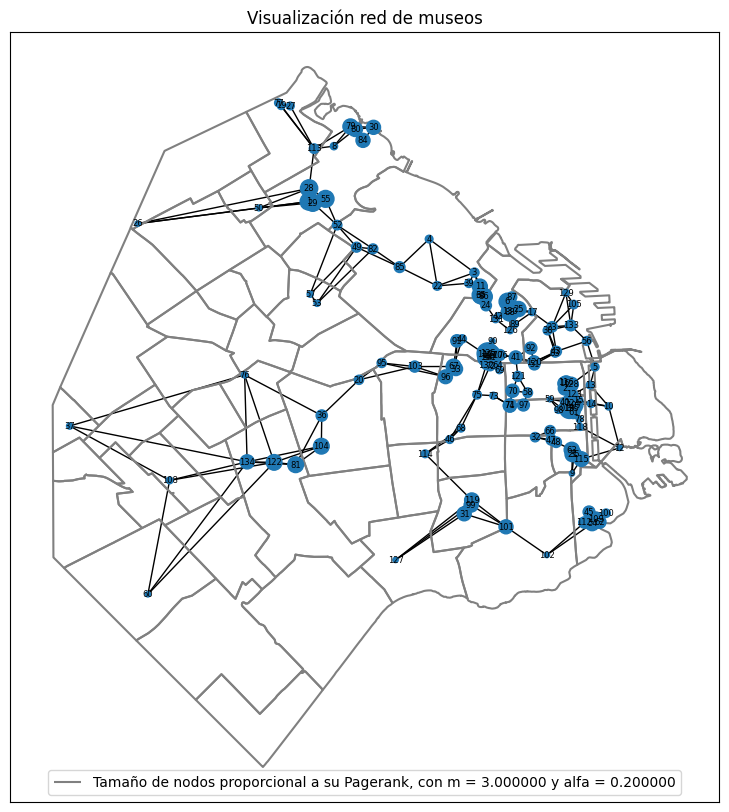

In [9]:
#Punto 3 primer item a

#Construcción matriz de adyacencia.
A = construye_adyacencia(D,3)

#la siguiente función recibe una matriz de adyacencia y un factor de amortiguamiento
puntajes_a = calcula_pagerank(A, 1/5)

#la siguiente función imprime el Page Rank de cada museo en pantalla
mostrar_pagerank(puntajes_a)
m = 3
alfa = 1/5

"""Red de museos, donde cada uno se conecta con sus m = 3 vecinos más cercanos y con factor de
amortiguamiento α = 1/5, asignando un tamaño a cada nodo proporcional al Page Rank que le toca."""
graficoA = grafico(m, alfa)

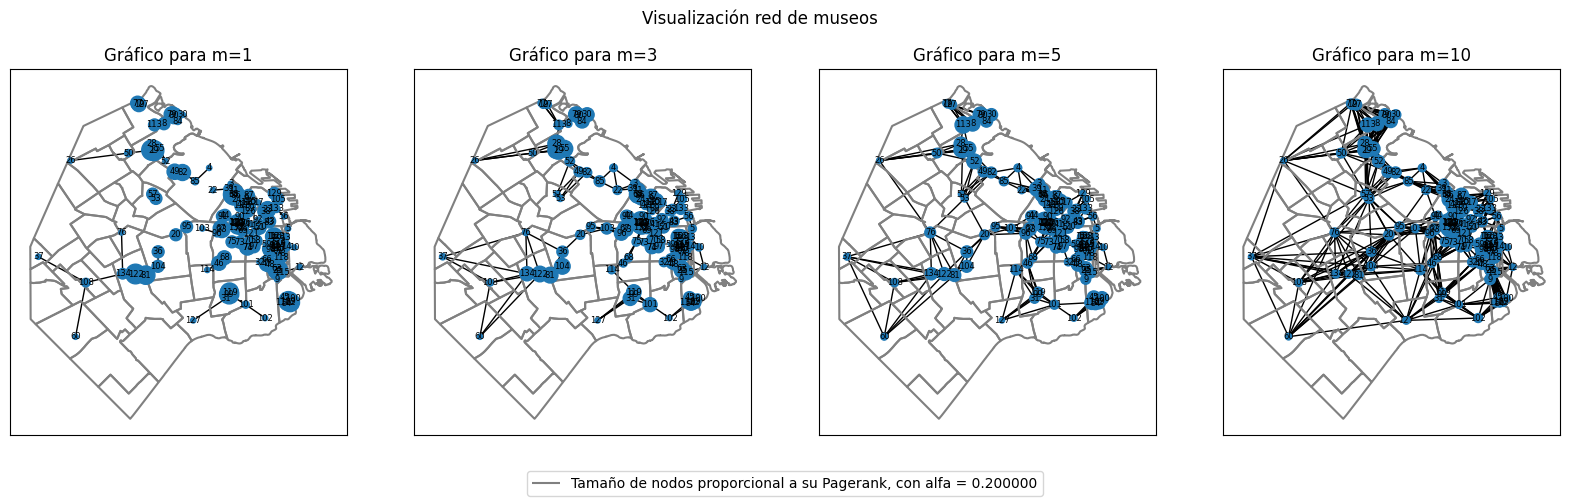

In [10]:
#Punto 3 item b + visualizaciones pedidas en el segundo ítem b
M = [1,3,5,10]
alfa = 0.2

#La función recibe una matriz de adyacencia y un factor de amortiguamiento (alfa)
#Calcula los Page Rank para cada cantidad de enlaces (m) solicitada
puntaje_b1 = calcula_pagerank(construye_adyacencia(D, 1), alfa)
puntaje_b2 = calcula_pagerank(construye_adyacencia(D, 3), alfa)
puntaje_b3 = calcula_pagerank(construye_adyacencia(D, 5), alfa)
puntaje_b4 = calcula_pagerank(construye_adyacencia(D, 10), alfa)

#Si se desea visualizar los Page Rank obtenidos de los museos en cada caso, se recomienda el uso de la función mostrar_pagerank, implementada en el archivo template_funciones.py
#mostrar_pagerank(puntaje_b1)
#mostrar_pagerank(puntaje_b2)
#mostrar_pagerank(puntaje_b3)
#mostrar_pagerank(puntaje_b4)


"""Red de museos, donde cada uno se conecta con sus m vecinos mas cercanos, para m = {1, 3, 5, 10} y
con factor de amortiguamiento fijo usando α = 1/5, asignando un tamaño a cada nodo proporcional al
Page Rank que le toca"""
agrupar_graficos_variacion_m(M, alfa)

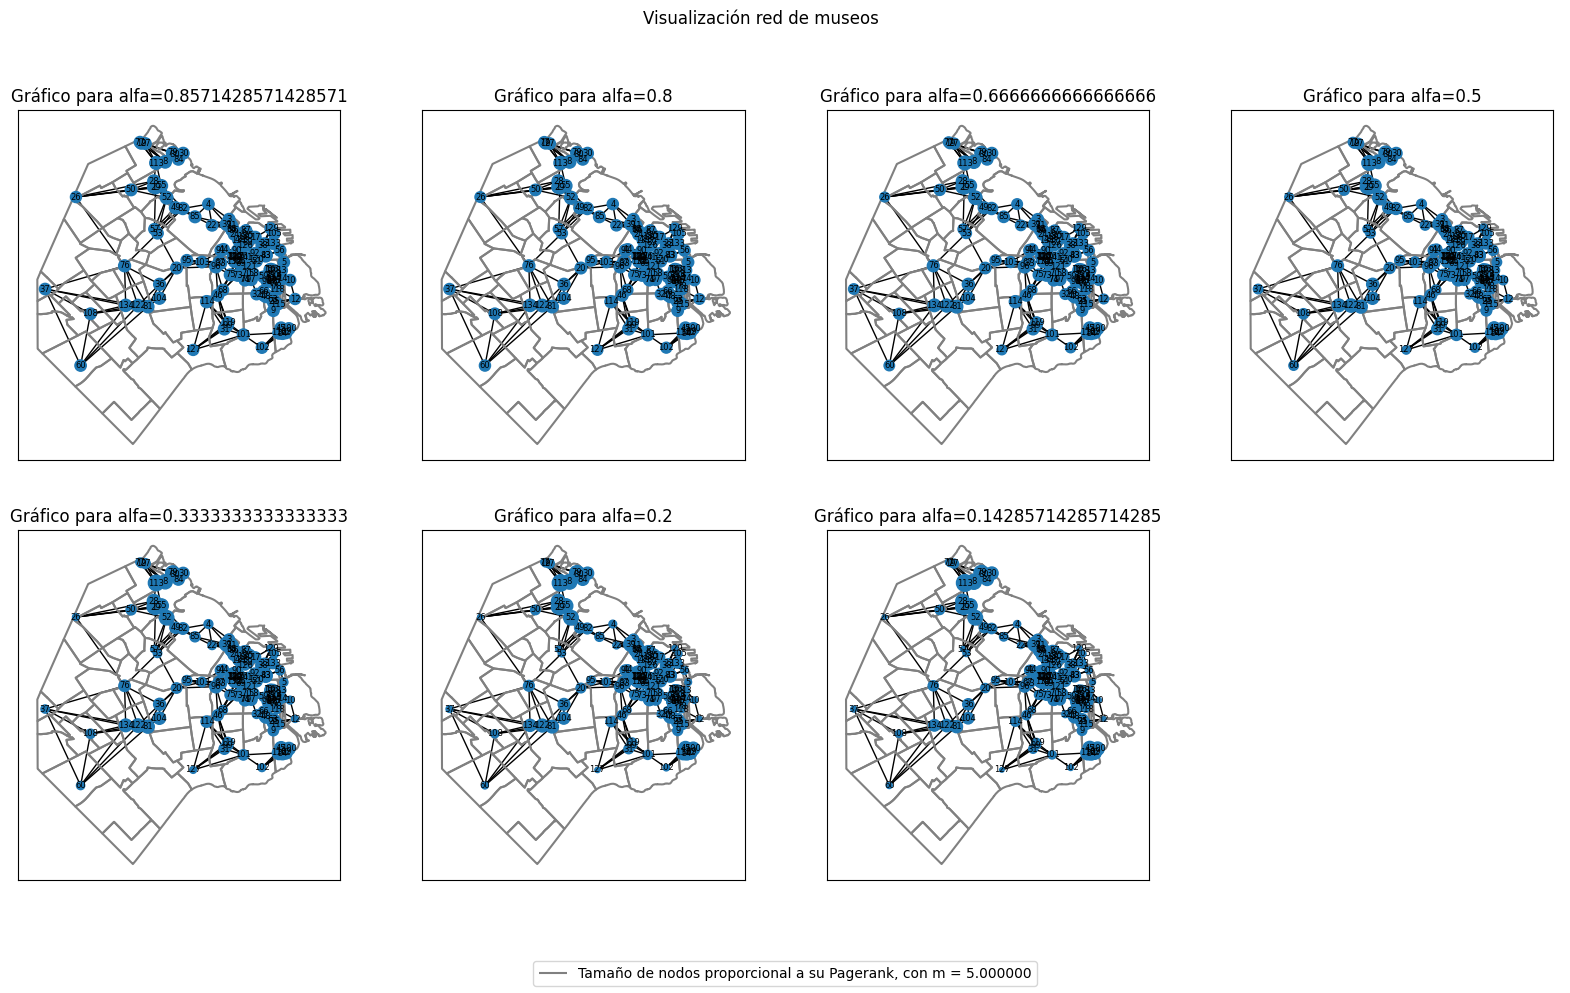

In [11]:
#Punto 3 item c + visualizaciones pedidas en el segundo ítem b
alfas = [6/7,4/5,2/3,1/2,1/3,1/5,1/7]
m = 5

#Construcción matriz de adyacencia.
matriz = construye_adyacencia(D, m)

#La función recibe una matriz de adyacencia y un factor de amortiguamiento
#Calcula los Page Rank para cada factor de amortiguamiento solicitado
puntaje_c1 = calcula_pagerank(matriz, 6/7)
puntaje_c2 = calcula_pagerank(matriz, 4/5)
puntaje_c3 = calcula_pagerank(matriz, 2/3)
puntaje_c4 = calcula_pagerank(matriz, 1/2)
puntaje_c5 = calcula_pagerank(matriz, 1/3)
puntaje_c6 = calcula_pagerank(matriz, 1/5)
puntaje_c7 = calcula_pagerank(matriz, 1/7)

#Si se desea visualizar los Page Rank obtenidos de los museos en cada caso, se recomienda el uso de la función mostrar_pagerank, implementada en el template_funciones.py
#mostrar_pagerank(puntaje_c1)
#mostrar_pagerank(puntaje_c2)
#mostrar_pagerank(puntaje_c3)
#mostrar_pagerank(puntaje_c4)
#mostrar_pagerank(puntaje_c5)
#mostrar_pagerank(puntaje_c6)
#mostrar_pagerank(puntaje_c7)


"""Red de museos, donde cada uno se conecta con sus m = 5 vecinos mas cercanos, y considerando los
valores de factor de amortiguamiento α = 6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7"""
agrupar_graficos_variacion_alfa(m, alfas)

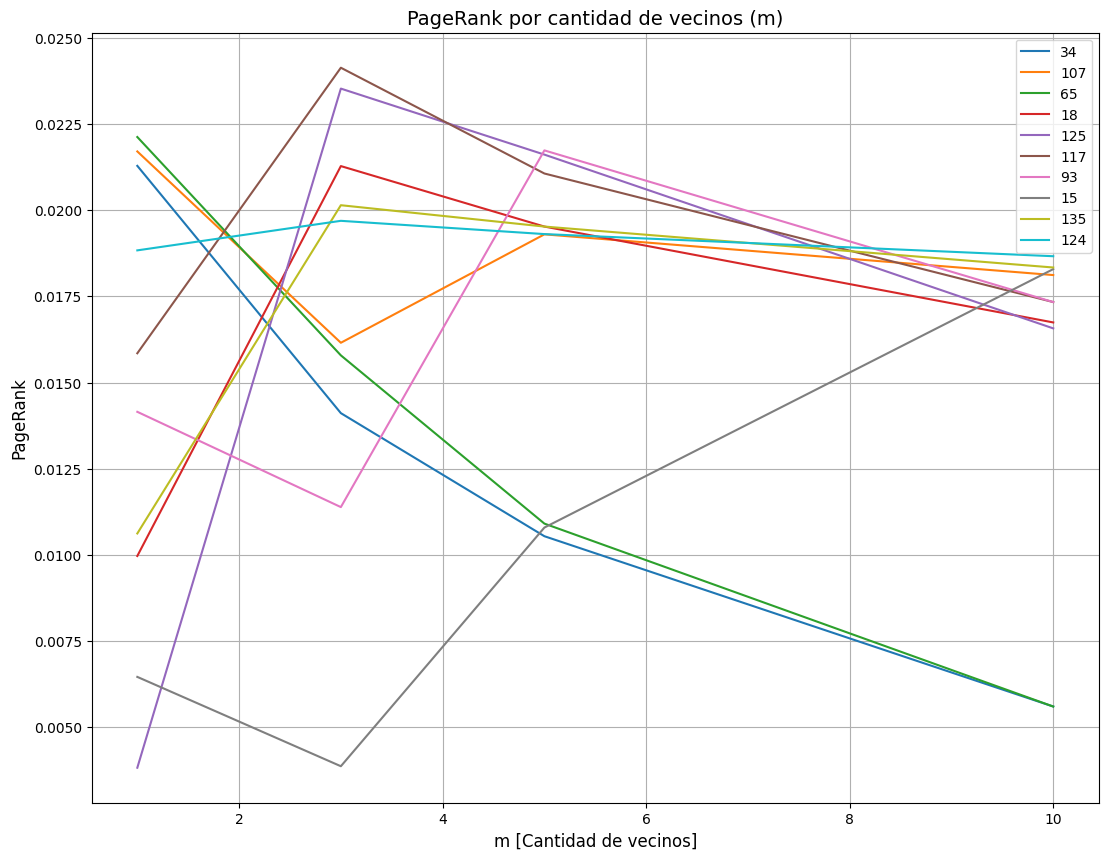

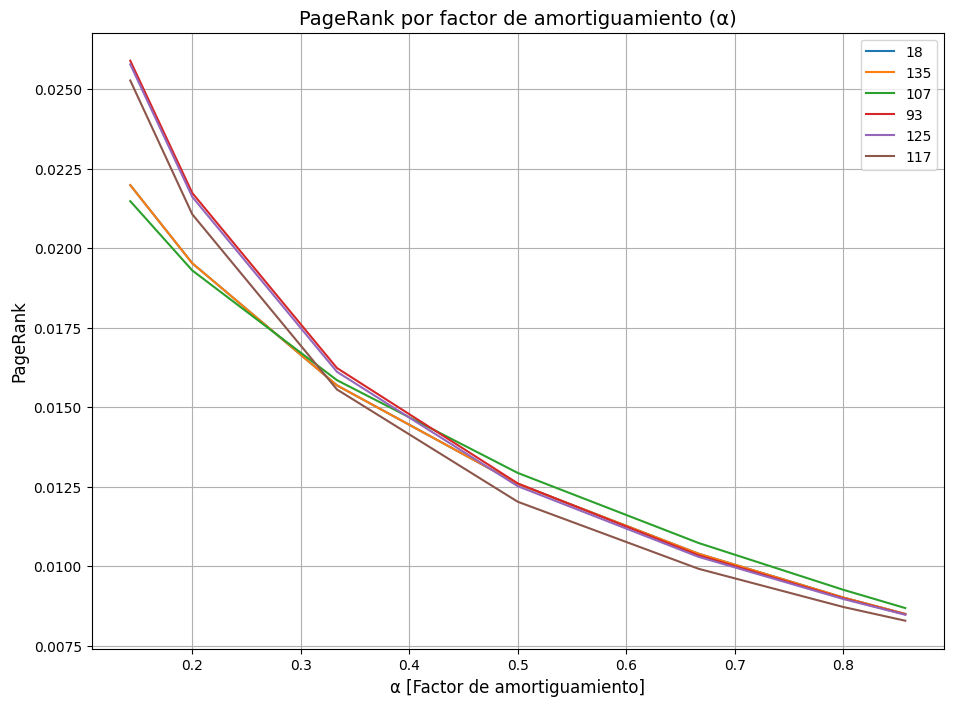

In [12]:
#Punto 3 segundo ítem a
M_values = [1,3,5,10]
alfa = 1/5
#La siguiente función recibe una lista de m (cantidad de enlaces) y un único α (factor de amortiguamiento).
#Agrupa los tres museos centrales para cada m y realiza un lineplot que muestra la variación de su pagerank.
graficos_pagerank_por_m(M_values, alfa)


#La siguiente función recibe una lista de alfas (α, factor de amortiguamiento) y un único m (cantidad de enlaces).
#Agrupa los tres museos centrales para cada α y realiza un lineplot que muestra la variación de su pagerank.
alfa_values = [6/7,4/5,2/3,1/2,1/3,1/5,1/7]
m = 5
graficos_pagerank_por_alfa(m, alfa_values)


# **Análisis General** (segundos ítems a y b)



Luego de haber realizado las visualizaciones del mapa utilizando el Page Rank para representar el tamaño de cada museo, los resultados arrojados por los gráficos de museos centrales en los casos solicitados; y analizando la información hallada en los puntajes calculados, se obtuvo que:

Por un lado, al utilizar los distintos valores de $m$ (cantidad de vecinos más cercanos) que fueron considerados, esto es, $m = 1, 3, 5, 10$; junto con $α$ (factor de amortiguamiento) fijo, cuyo valor es de **1/5**; los museos que obtuvieron mayor Page Rank en cada caso fueron:

*   $m = 1$ : (**65**, 0.022124183006535954), (**107**, 0.021705882352941182), (**34**, 0.02128758169934641
*   $m = 3$ : (**117**, 0.024135005552429513), (**125**, 0.02352939704405662), (**18**, 0.021280854967728868)
*   $m = 5$ : (**93**, 0.021736255894120298), (**125**, 0.02161401652537472), (**117**, 0.021065661658928064)
*   $m = 10$ : (**124**, 0.01866544381551542), (**135**, 0.01833819870655664), (**15**, 0.01829068085587275)

Más en detalle, se puede ver que, cuando se busca los 3 vecinos más cercanos, los resultados de Page Rank de ciertos museos alcanzan valores mayores que en otros casos (hasta un 2.4% de Page Rank para el museo 117), lo que genera que probablemente haya mayor contraste en el tamaño de los nodos al momento de graficar. Luego, al aumentar $m$, los valores de Page Rank de los museos convergen a un mismo número.

\

Análogamente, también se analizó en detalle qué ocurre al variar los valores de $α$, que son  $α = [6/7,4/5,2/3,1/2,1/3,1/5,1/7]$, teniendo en este caso a un $m$ fijo, $m = 5$. Aquellos que obtuvieron mayor Page Rank en cada caso fueron:

*   $α = 6/7$ : (**107**, 0.008680522669439764), (**135**, 0.008495864796563618), (**18**, 0.008495864796563616)
*   $α = 4/5$ : (**107**, 0.009255573843367027), (**18**, 0.009012675802001865), (**135**, 0.009012675802001865)
*   $α = 2/3$ : (**107**, 0.010726921027230841), (**18**, 0.010390168197539571), (**135**, 0.01039016819753957)
*   $α = 1/2$ : (**107**, 0.012930502796005322), (**93**, 0.012601279856066122), (**135**, 0.012585386137257223)
*   $α = 1/3$ : (**93**, 0.016230380890655854), (**125**, 0.016112373613018482), (**107**, 0.015848311223301628)
*   $α = 1/5$ : (**93**, 0.021736255894120298), (**125**, 0.02161401652537472), (**117**, 0.021065661658928064)
*   $α = 1/7$ : (**93**, 0.025896005811955315), (**125**, 0.025781082435200862), (**117**, 0.02527389536044914)

En esta situación, se observa que, si $m$ está fijo, los museos que poseen mayor Page Rank suelen ser similares (se presenta una estabilidad en cuanto al ranking de museos con mayor puntaje), lo que significa que el factor de amortiguamiento no provoca un drástico cambio con respecto al Page Rank que cada museo obtuvo. Por otro lado, un detalle no menor es que, al aumentar el valor de $α$, cada puntaje converge a un valor similar para todos los museos, pues al aumentar el coeficiente de dumping, cada uno tiende a tener la misma posibilidad de ser "el prÓximo", por lo tanto, los valores se van acercando a $\frac{1}{N}$, con $N$ cantidad de nodos (museos) en la red.

\

Por lo tanto, luego de visualizar en los gráficos aquellos museos que fueron centrales en cada caso, se puede apreciar a simple vista que, para los valores de $m$ y $α$ utilizados, los museos que obtuvieron mayor Page Rank fueron aquellos que se encuentran en las regiones más céntricas/polos más concentrados de C.A.B.A., es decir, las regiones en donde hay mayor aglomeración de museos en la Ciudad.


## Punto 4:

$C$ está definida como la **matriz de transiciones**. Esto significa que $C_{ji}$ representa la probabilidad de moverse al museo $j$ luego de haber visitado el $i$ (exceptuando caso $j=i$ pues partimos de la base de que el caminante no puede moverse del museo $i$ al $i$ nuevamente, y por lo tanto $C_{ii}$ = 0).

Es por este motivo que, al considerar al vector $v_0 \in \mathbb{K}^n$, el cual representa la distribución de museos que son la primer visita de los visitantes, y que tiene en su elemento $i$ la cantidad de visitantes que tienen al museo $i$ como su primer opción, entonces $v_1 = Cv_0$ representa al número de visitantes estimado que tendrá cada museo $i$ en el siguiente paso (donde cada paso/instancia la describimos como $k$, con $k \geq 0$ pues de lo contrario el sistema nunca habría comenzado).

Siguiendo esta lógica, $v_2 = Cv_1 = CCv_0 = C^2v_0$, es decir que cada instancia $k$ estará dada por la matriz $C^k$ (que describe la probabilidad de ir del museo $i$ al museo $j$ luego de $k$ pasos) en conjunto con $v_{0}$ que describe la cantidad de gente que había en cada museo $i$ al comienzo del sistema.  

En definitiva, esto se reduce a $v_k = C^kv_0$.

Ahora bien, si queremos hacer el cálculo estimado de cuántas personas visitaron cierto museo $i$ después de que cada persona de nuestro sistema incial realizara $r$ visitas antes de abandonar el sistema, eso se traduce en hacer la suma de cada vector $v_{0,..,r-1}\ , $ o en otras palabras, sumar la cantidad de gente que se estimó que había en el museo $i$ para cada paso/ronda que se dió (Nota: tomamos la instancia asociada a la primer visita como la número 0, de ahí la razón de ser de los subíndices del vector). Matemáticamente, si llamamos al vector $w \in \mathbb{K}^n$ aquel que describe en cada $w_i$  el número total de visitantes que se recibieron en el museo $i$ al finalizar el sistema, entonces luego $w_i = \sum_{k=0}^{r-1} v_{k_{i}} \quad$ (o, en su conjunto, $w = \sum_{k=0}^{r-1} v_k$).

Si desglosamos cada $v_k$, tenemos que $v_0 = C^0v_0 = v_0, \ v_1 = C^1v_0, \ ... \ , \ v_{r-1} = C^{r-1}v_0$.  Por lo tanto, esto implica que:

$w = \sum_{k = 0}^{r-1}C^kv_0 = (\sum_{k = 0}^{r-1}C^k) \ v_0 \quad $ pues $v_0$ no varía en función de $k$.

Si llamamos $B = \sum_{k = 0}^{r-1}C^k $, entonces $w = B \ v_0$

Es por eso que, finalmente, como $B$ se puede suponer inversible, y llamando $v$ a $v_0$ conseguimos:

$v = B^{-1}w \quad$ como se quería probar

$\hspace{15cm} \huge \boxtimes$

## Punto 5:

In [13]:
# La siguiente función genera la matriz de transiciones definida en la ecuación (4) del PDF
C_continua = calcula_matriz_C_continua(D)

# Calcula la matriz B a partir de la nueva matriz de transiciones C y el número de pasos (r)
# Retorna la matriz B de la ecuación (5) del PDF
r = 3
B = calcula_B(C_continua, r)

# La siguiente función toma como parámetros la matriz B y el vector w
# Función que resuelve la ecuación (5) del PDF
# Retorna el vector v definido en el punto anterior
v = resolver_sist(B)

Para obtener la cantidad total de los visitantes que había al inicio del sistema, lo que buscamos resolver es la ecuación $Bv = w$. \
Para ello, programamos una función que calcule la matriz $B$ tal como fue descripta; y, al ser inversible, aprovechamos su descomposición $LU$ para resolver los sistemas: \
$Ly =w$ \
$Uv = y$

De esta manera, logramos hallar al vector $v$ que, como explicamos, en cada $v_i$ almacena la cantidad de visitantes que, al iniciar el sistema, se hallaron en el museo $i$. Luego, si nosotros queremos conocer la cantidad total inicial de visitantes, eso equivale a sumar cada $v_i$ (el cual, al tratarse de una cantidad de personas, es positivo o nulo); en definitiva, calcular $||v||_1$. Es por eso que, finalmente:

$||v||_1 = \text{calcular_norma_1}(v)$ \
$ ||v||_1 = 136605$ \

(Nota: $||v||_1$ la redondeamos pues se trata de una cantidad de personas).

In [14]:
# Función que recibe un vector y calcula su norma_1
calcular_norma_1(v)

La norma 1 del vector v ingresado es: 136605.0


## Punto 6:

In [15]:
# La siguiente función calcula el número de condición de una matriz.
# Toma como parámetro la matriz al cual se le interesa hallar su número de condición.
# Para esto, la matriz ingresada debe ser inversible.
Cond_1_B = condicion_1_B(B)
print(f'El número de condición_1 de la matriz B ingresada es: {Cond_1_B}')


El número de condición_1 de la matriz B ingresada es: 5.051771176665007


Sea el error relativo de la cantidad total final de visitantes un $5 \% $ ($\frac{||w - \tilde{w}||_1}{||w||_1} = 0.05$).

Y sea, $B = \sum_{k = 0}^{2}C^k $ pues tengo $r$ = cantidad de visitas = 3.

Entonces luego, se puede acotar el error relativo de la cantidad inicial de personas al inicio del sistema como:

$\frac{||v - \tilde{v} ||_1}{||v||_1} \leq Cond_1(B)  \frac{||w - \tilde{w} ||_1}{||w||_1}$

\

Ahora, para calcular $Cond_1(B) = ||B||_1||B^{-1}||_1$, utilizamos nuestra función `condicion_1_B`, el cual arroja que $Cond_1(B) = 5.051771176665007$

Podemos acotar superiormente el error de estimación de $v$ por $e_{\frac{||v - \tilde{v} ||_1}{||v||_1}} \sim 0.2526$

\

Finalmente, $\frac{||v - \tilde{v} ||_1}{||v||_1} \leq Cond_1(B)  \frac{||w - \tilde{w} ||_1}{||w||_1} \sim 0.2526$

In [16]:
error = Cond_1_B * 0.05
print(f'El error de estimación de v se puede acotar por {error}')

El error de estimación de v se puede acotar por 0.2525885588332503


# **TP PARTE 2**

## Punto 1:

**PUNTO 1A**

Se pide mostrar que $\mathbf{\vec{1}}$ es autovector de las matrices $L$ y $R$, donde

$ L = K - A$ &nbsp; &nbsp; con

* $
A_{ij} =
\begin{cases}
1 & \text{si hay enlace/conexión entre el museo i y el museo j} \\
0 & \text{si es que no.}
\end{cases}
$

* $
K_{ij} =
\begin{cases}
\sum_{h=1}^{N} A_{ih} & \text{si } i = j \\
0 & \text{si } i \neq j
\end{cases}
$

$R = A - P$ &nbsp; &nbsp; con

* $A$ matriz definida arriba.

* $P \in \mathbb{R}^{n*n},$ donde $P_{ij} = \frac{k_i k_j}{2E} $ &nbsp; &nbsp; representa el numero esperado de coexiones entre los museos $i$ y $j$ , con $k_h$ grado del museo $h$ (cantidad de enlaces salientes) y $E$ cantidad total de enlaces, $\ 2E = \sum_{i=1}^{N} \sum_{j=1}^{N} A_{ij}$ &nbsp; &nbsp; donde el $2$ proviene de sumar dos veces cada conexión.

\

Empezamos demostrando para $L$, aunque realizando algunas observaciones preliminares:

$A$ es simétrica, pues consideramos redes sin dirigir, y con $0$'s en la diagonal al restringir los enlaces entre un mismo museo.

$K$ es una matriz diagonal, en donde cada valor de su diagonal equivale a la cantidad de enlaces salientes que hay descriptos en la fila correspondiente de $A$ (como se detalló anteriormente).

\

Luego, por lo mencionado, $L$ tendrá la siguiente forma:

$
L_{ij} =
\begin{cases}
\sum_{h=1}^{N} A_{ih} & \text{si } i = j \\
-1 & \text{si hay enlace/conexión entre el museo i y el museo j con } i\neq j \\
\ \ \ 0 & \text{caso contrario.}
\end{cases}
$

Ahora bien, se puede ver que $\ (L \ \mathbf{\vec{1}})_{i} = \sum_{j = 1}^{N} L_{ij}$

Es decir, si llamamos $v$ al vector resultante, éste tendrá en su posición $v_i$ la suma de los elementos de la fila $i$ de $L$.

Posteriormente, observando la estructura de $L$,  se tiene que

$\sum_{j = 1}^{N} L_{ij} = K_{ii} + \sum_{j = 1}^{N} A_{ij}*(-1) = \sum_{j = 1}^{N} A_{ij} - \sum_{j = 1}^{N} A_{ij} = 0 \ \ \ ∀i$

Es decir:

$L \ \mathbf{\vec{1}} = \vec{0}$

Lo que se puede expresar como:

$L \ \mathbf{\vec{1}} = 0 * \mathbf{\vec{1}}$ &nbsp; &nbsp; con $\vec{1}$ autovector asociado al autovalor $\lambda = 0$


\

Veamos ahora el caso de la matriz $R$

Por lo que hemos visto al definir la matriz, se puede deducir que $R$ tiene la forma:

$
R_{ij} =
\begin{cases}
-\frac{k_i^2}{2E} & \text{si } i = j \\
1 - \frac{k_ik_j}{2E} & \text{si hay enlace/conexión entre el museo i y el museo j con } i\neq j \\
-\frac{k_ik_j}{2E} & \text{caso contrario.}
\end{cases}
$

De manera análoga, se puede ver que ($R \ \vec{1})_i = \sum_{j=1}^{N} R_{ij}$

Es decir, que si llamamos $v$ al vector resultante, éste tendrá en su posición $v_i$ la suma de los elementos de la fila $i$ de $R$.

Analizemos entonces $\sum_{j=1}^{N} R_{ij}$

Por cada fila, ocurre una única vez $i = j$, por lo que habrá uno y solo un término de la forma $-\frac{k_i^2}{2E}$

Por otra parte, para el segundo caso, notar que la fila $i$ de $R$ está compuesta por la fila $i$ de $A$ y $P$. Luego, la cantidad de términos de la forma $1 - \frac{k_ik_j}{2E}$ son $k_i$, pues éste es el número de enlaces salientes que posee el museo $i$ (o sea, la cantidad de $1$'s con los que cuenta la fila $i$ de $A$).

El resto de los términos, tendrán la forma $- \frac{k_ik_j}{2E}$. Notar que, entre estos dos últimos casos, se consigue que en la suma de toda una fila $i$ tendremos $k_i - \sum_{j\neq i}^{N}\frac{k_ik_j}{2E}$ &nbsp; &nbsp; (donde el $k_i$ que se encuentra por fuera de la sumatoria sale del hecho de que tenemos esa suma de $1$'s).

Y agregándole el primer caso, nos queda entonces que:

$\sum_{j=1}^{N} R_{ij} = -\frac{k_i^2}{2E} + k_i - \sum_{j\neq i}^{N}\frac{k_ik_j}{2E}$

Desarrollamos:

$-\frac{k_i^2}{2E} + k_i - \sum_{j\neq i}^{N}\frac{k_ik_j}{2E} = -\frac{k_i^2}{2E} + k_i - k_i*\sum_{j\neq i}^{N}\frac{k_j}{2E} = k_i*(1 -\frac{k_i}{2E} - \sum_{j\neq i}^{N}\frac{k_j}{2E})$

Luego, esto resulta en que $\sum_{j=1}^{N} R_{ij} = k_i*(1 - \sum_{j=1}^{N}\frac{k_j}{2E}) = k_i*(1 - \frac{1}{2E}*\sum_{j=1}^{N}k_j)$

Pero hemos definido que $2E = \sum_{i=1}^{N} \sum_{j=1}^{N} A_{ij}$ &nbsp; &nbsp; que equivale a la cantidad de conexiones que hay en nuestro sistema (contados dos veces). Y, como definimos a $k_h$ como el grado (cantidad de enlaces salientes) del museo $h$, entonces esto implica que la sumatoria se pueda reescribir como:  

$\sum_{i=1}^{N} \sum_{j=1}^{N} A_{ij}= \sum_{j=1}^{N}k_j$ &nbsp; &nbsp; es decir, $2E$ representa la sumatoria de los grados de los museos de la red.

Por lo que finalmente obtenemos:

$\sum_{j=1}^{N} R_{ij} =  k_i*(1 - \frac{1}{2E}*\sum_{j=1}^{N}k_j) = k_i(1 - \frac{2E}{2E}) = k_i(1 - 1) = 0 \ \ \forall i$

Es así que $R \ \vec{1} = \vec{0}$

O, expresado de otra forma:

$R \ \vec{1} = 0*\vec{1}$ con $0$ autovalor y $\vec{1}$ su autovector asociado.


\

El hecho de que el $\vec{1}$ sea un autovector de ambas matrices, ocurre pues éste representa la partición trivial, es decir, se puede considerar a todos los museos como parte de un mismo grupo, o formando una misma comunidad (la totalidad de la red).

**PUNTO 1B**

Para $L/R$, contamos con dos autovectores $v_1, v_2$ asociados a sus respectivos autovalores $\lambda_1, \lambda_2$ con $\lambda_1 \neq \lambda_2$.

Además, se conoce que tanto $L$ como $R$ son matrices simétricas.

Se quiere ver que $v_1^{t}*v_2 = 0$

Para simplificar notación, llamaremos $M$ a la matriz que bien podría ser $L$ o $R$. Luego, $M$ es simétrica.

Tenemos que:

$M v_1 = \lambda_1 * v_1$

$M v_2 = \lambda_2 * v_2$


Realizando el producto interno $\langle v_1, M v_2 \rangle$, nos queda que:

$\langle v_1, M v_2 \rangle = v_1^{t} M v_2 = v_1^{t} \lambda_2 v_2 = \mathbf{\lambda_2 v_1^{t} v_2}$

Sin embargo, como $M$ es simétrica, se observa que:

$\langle v_1, M v_2 \rangle = v_1^{t} M v_2 = (M v_1)^{t}v_2 = \mathbf{\lambda_1v_1^{t}v_2}$

Igualando ambos resultados, se obtiene:

$\lambda_2 v_1^{t}v_2 = \lambda_1v_1^{t}v_2$

Pero entonces, como $\lambda_1 \neq \lambda_2$:

$(\lambda_2 v_1^{t}v_2 = \lambda_1 v_1^{t}v_2) \iff v_1^{t}v_2 = 0$ &nbsp; &nbsp; como se quería ver.

\

De manera análoga, haciendo el producto interno  $\langle v_2, M v_1 \rangle$:

$\langle v_2, M v_1 \rangle = v_2^{t} M v_1 = v_2^{t} \lambda_1 v_1 = \mathbf{\lambda_1 v_2^{t} v_1}$

Y, al ser $M$ simétrica:

$\langle v_2, M v_1 \rangle = v_2^{t} M v_1 = (M v_2)^{t}v_1 = \mathbf{\lambda_2v_2^{t}v_1}$

Si igualamos las partes obtenidas, se tiene:

$\lambda_1 v_2^{t}v_1 = \lambda_2v_2^{t}v_1$

Pero al ser $\lambda_1 \neq \lambda_2$, entonces la igualdad solo se cumple si $v_2^{t}v_1 = 0$

\

$\hspace{14cm} \huge\boxtimes$

**PUNTO 1C**

Se busca mostrar que, sea $v$ autovector de autovalor $\lambda \neq 0$ de $R$ o $L$, entonces $\sum_{i=1}^{N} v_i = 0$

Llamemos $M$ a la matriz que bien podría ser $R$ o $L$. Luego, $M$ es simétrica, pues $R$ y $L$ lo son. Esto implica que, por propiedad, los autovectores de $M$ asociados a autovalores distintos son ortogonales entre sí.

Por otro lado, por lo observado en incisos anteriores, el vector $\vec{1} = (1,...,1)$ es autovector de $M$ asociado al autovalor $\lambda = 0$.

Es por esto que, llamando $v$ autovector de $M$ asociado al autovalor $\lambda \neq 0$, se tiene que:

$\vec{1}^{t} v = 0 \ $ pues son autovectores asociados a distintos autovalores, lo que conlleva que sean perpendiculares entre sí.

Pero esto es análogo a:

$v_1 * 1 + v_2 * 1 + ... + v_N * 1 =  0$

Finalmente, se deduce que:

$\sum_{i=1}^{N} v_i = 0 \quad $ como se quería probar.

$\hspace{15cm} \huge\boxtimes$

## Punto 2:

**PUNTO 2A**

Consideramos una matriz $M \in \mathbb{R}^{n×n}$ diagonalizable con autovalores $\lambda_1 \geq \lambda_2\geq ···\geq \lambda_n, \ $  y un autovector $v_i$ asociado a $\lambda_i$.

Queremos ver que los autovalores de $M + \mu I$ son de la forma $\gamma_i = \lambda_i + \mu$ y que el autovector asociado es $v_i$

Por último, buscaremos concluir que si $\lambda_i + \mu \neq 0 \ \ \ \forall i$, entonces $M + \mu I$ es inversible.

Partimos de: $Mv_i = \lambda_i v_i$

Analizamos ahora qué ocurre con $(M + \mu I)v_i$

$(M + \mu I)v_i = Mv_i + \mu I v_i = \lambda_i v_i + \mu v_i$

Finalmente, sacando $v_i$ de factor común en la ecuación, y retomando la igualdad inicial; se llega a que:

$(M +\mu I)v_i = (\lambda_i + \mu)v_i$

Y como $\lambda_i, \mu \in \mathbb{R} → (\lambda_i + \mu) \in \mathbb{R}$

$\therefore \ \lambda_i + \mu $ es autovalor de $M + \mu I, \ $ y $\ v_i$ es un autovector asociado a ese autovalor.

\

Por otro lado, para ver inversibilidad, supongamos que no es cierto que, si $\lambda_i + \mu \neq 0 $, entonces $M + \mu I$ es inversible. Es decir, planteemos que $\exists w \in \mathbb{R}^n, w \neq \vec{0} :  (M + \mu I)w = \vec{0} \ $ con $\ \lambda_i + \mu \neq 0$ .

Desarrollamos:

$(M + \mu I)w = Mw + \mu I w = Mw + \mu w  = \vec{0}$

Entonces, esto implica que:

$Mw = -\mu w$

Es decir, que para que sea cierto, se requiere que $\ \exists \lambda_i$ autovalor de $M$ tal que $w$ es autovector, y este autovalor tenga la forma $\lambda_i = -\mu$.

Pero entonces, $\gamma_i = \lambda_i + \mu = -\mu + \mu = 0 \ ABS, \ \ $ donde el absurdo vino de suponer que se cumplía aún cuando $\lambda_i + \mu \neq 0$.

$\therefore \ \forall i   \ \ \lambda_i + \mu \neq 0  \ → M + \mu I \ $ es inversible, como se quería probar.

$\hspace{27cm} \huge\boxtimes$

**PUNTO 2B**

Consideramos el laplaciano $L$, con $L$ simétrico y semidefinido positivo.

Tomando $\mu > 0$, queremos ver que $L + \mu I$ es inversible.

Partimos con que:

$L = L^{t}$ &nbsp; pues $L$ simétrico.

$\forall v \in \mathbb{R}^{n}, \ \ v^{t}Lv \geq 0 $ &nbsp; pues $L$ semidefinido positivo.

Por otra parte, tenemos por teorema que, como $L$ es una matriz simétrica, entonces $L$ es diagonalizable.

Luego, como hemos probado en el inciso ($a.$) que, siendo $M \in \mathbb{R}^{n*n}$ diagonalizable con $\lambda_1, ..., \lambda_n$ sus autovalores (contados con multiplicidad), entonces si $\ \forall i, \ \lambda_i + \mu \neq 0 \rightarrow M + \mu I$ es inversible; nos bastará ver que $L$ tiene únicamente autovalores positivos para probar que $L + \mu I$ es inversible (pues $\mu > 0$).

Tomando $\lambda_i$ autovalor de $L$, con $v_i$ autovector asociado, entonces:

$L v_i = \lambda_i v_i$

Ahora, si planteamos el producto interno $\langle v_i, L v_i \rangle$ nos queda que:

$\langle v_i, L v_i \rangle = v_i^{t}Lv_i = v_i^{t}\lambda_i v_i = \lambda_i v_i^{t}v_i = \lambda_i||v_i||_2^{2}$

(Nota: al ser $L$ simétrica, es indistinto el resultado de hacer $\langle v_i, L v_i \rangle$ o $\langle Lv_i, v_i \rangle$ pues:

$\langle L v_i, v_i \rangle = (Lv_i)^{t}v_i = v_i^{t} L^t v_i = v_i^tLv_i = \lambda_i ||v_i||_2^2$ = $\langle v_i, L v_i \rangle$ )

Como $|| \ .||_2 : \mathbb{K}^{n} \rightarrow \mathbb{R}_{\geq 0}$ pues norma vectorial; donde $||w||_2 = 0 \iff w = \vec{0} $ por propiedad de normas, eso significa que $||v_i||_2^{2} > 0$ pues $v_i$ autovector.

Finalmente, si tenemos en cuenta este resultado en conjunto con que $L$ es semidefinida positiva:

$\lambda_i||v_i||_2^{2} \geq 0 \ → \lambda_i \geq 0$

Por lo tanto, todos los autovalores de $L$ son no negativos. Es así que, como $\mu > 0 → \lambda_i + \mu \neq 0$, lo que resulta en que $L + \mu I$ sea inversible.

\

También se pide ver que, si se le aplica el método de la potencia a $(L + \mu I)^{-1},$ éste converge al autovector asociado al autovalor más chico de $L$.


Para ello, partimos mencionando que, en el inciso ($a.$), se probó que si $\lambda_i $ autovalor de $L$ con $v_i$ autovector asociado; entonces $\lambda_i + \mu$ es autovalor de $L + \mu I \ $ con $v_i$ autovector. Además, es importante tener en cuenta que para que suceda la convergencia buscada, es necesario partir por una semilla adecuada, pues computacionalmente, en el método de la potencia, se genera inicialmente un vector aleatorio (de dimensiones acordes al problema). Si este vector es perpendicular al autovector que nosotros buscamos, entonces los siguientes razonamientos desarrollados no funcionarán (es una situación de ínfimas probabilidades de ocurrencia, pero es crucial reconocer que la posibilidad existe).

Dicho todo esto, queremos ver ahora cuáles son los autovalores de $(L + \mu I)^{-1}$

Sabemos que: $(L + \mu I)v_i = (\lambda_i + \mu)v_i$

Luego, si multiplicamos por la inversa a ambos lados nos queda que:

$(L + \mu I)^{-1} (L + \mu I)v_i = (L + \mu I)^{-1}(\lambda_i + \mu)v_i$

$Iv_i = (L + \mu I)^{-1}(\lambda_i + \mu)v_i$

$v_i = (\lambda_i + \mu) (L + \mu I)^{-1} v_i$

$\frac{1}{\lambda_i + \mu} v_i =  (L + \mu I)^{-1} v_i$ &nbsp; con $\lambda_i + \mu \neq 0$ pues $L + \mu I$ inversible.

Reescribiendo para mayor claridad:

$(L + \mu I)^{-1} v_i = \frac{1}{\lambda_i + \mu} v_i$


Por lo tanto, los autovalores de $(L + \mu I)^{-1}$ son los inversos de $(L + \mu I)$ pero con los mismos autovectores asociados en cada uno. En definitiva, los autovalores de $(L + \mu I)^{-1}$ tienen la forma $\frac{1}{\lambda_i + \mu}$ con $v_i$ autovector asociado, donde $\lambda_i$ es autovalor de $L$ con $v_i$ autovector.

Entonces, retomando la problemática inicial, y teniendo en cuenta que, a través del método de la potencia, los resultados convergen al autovector asociado al autovalor de mayor módulo; si se lo aplica a $(L + \mu I)^{-1}$, éste arrojará el autovector $v_i$ asociado a:

$\max\limits_{1 \leq i \leq n} \{|\frac{1}{\lambda_i + \mu} |\}$ con $\lambda_i$ autovalor de $L. \ $ (Nota: como $\mu , \lambda_i \geq 0$, entonces el módulo no hace diferencia).

\

Luego, puesto que $\mu$ es un valor fijo, el máximo se alcanza con
$\min\limits_{1 \leq i \leq n} \{\lambda_i\}$ .

$\therefore \ $ si se le aplica el método de la potencia a $(L + \mu I)^{-1}$, éste convergerá al autovector asociado al autovalor más chico de $L$ como se quería probar.

\

Por último, se pide indicar, en el caso de que hay solo un autovector con dicho autovalor, cuál es dicho autovector y cuánto vale su autovalor.

Hemos visto que, dado que $L$ es simétrica y semidefinida positiva, entonces todos sus autovalores son mayores o iguales a cero.
Adicionalmente, se ha corroborado que $\vec{1}$ es autovector de autovalor $\lambda = 0$, lo que implica que es éste su autovalor mínimo.

Posteriormente, teniendo que $\ \vec{1}$ es su autovector asociado, éste será también el autovector asociado a $\frac{1}{0 + \mu} = \frac{1}{\mu} \ $, el cual es entonces el autovalor máximo de $(L + \mu I)^{-1}$.

**PUNTO 2C**

Queremos ver que, sea $\lambda_1$ autovalor de $M$, con $M$ simétrica; y sea $v_1$ el autovector asociado a $\lambda_1$, entonces $\tilde{M} = M - \lambda_1 \frac{v_1 v_1^{t}}{v_1^{t}v_1}$ tiene los mismos autovectores que $M$ pero el autovalor asociado a $v_1$ es $\lambda = 0$.

$\textbf{Observación: }$ como $M$ es simétrica, entonces existe una base ortogonal de autovectores.


Luego, tomamos $\{v_1, v_2, ..., v_N\} $ base de autovectores de $M$ con $v_1$ el autovector definido al inicio; y $v_1 \perp v_2, ..., v_1 \perp v_N$ (misma situación $\forall v_i, v_j \in \{v_1, v_2, ..., v_N\}$ con $v_i \neq v_j$; todos los vectores son ortogonales entre sí).

\

Entonces, sea $v_i$ vector de la base asociado al autovalor $\lambda_i$, con $v_i \neq v_1$. Desarrollando, tenemos que:

$\tilde{M}v_i = (M - \lambda_1\frac{v_1 v_1^{t}}{v_1^{t}v_1})v_i = Mv_i - \lambda_1\frac{v_1 v_1^{t}}{v_1^{t}v_1} v_i = \lambda_i v_i - \lambda_1\frac{v_1 v_1^{t}v_i}{v_1^{t}v_1}$

Pero, como $v_1 \perp v_i$, pues vectores distintos de la base:

$v_1^{t}v_i = 0$

Es así que:

$\tilde{M}v_i = \lambda_i v_i - \lambda_1\frac{v_1 *\  0}{v_1^{t}v_1} = \lambda_i v_i - \lambda_1*0 = \lambda_iv_i$

$\therefore \quad \forall v_i \neq v_1, \ v_i$ es autovector de $\tilde{M}$ asociado al mismo autovalor que con la matriz $M$.

\

Ahora bien, veámos qué ocurre con $v_1$.

$\tilde{M}v_1 = (M - \lambda_1\frac{v_1 v_1^{t}}{v_1^{t}v_1})v_1 = Mv_1 - \lambda_1\frac{v_1 v_1^{t}}{v_1^{t}v_1}v_1 = \lambda_1v_1 - \lambda_1\frac{v_1 v_1^{t}v_1}{v_1^{t}v_1}$

Notar que el término $v_1^{t}v_1$ es un escalar (en particular, $||v_1||_2^{2}$) distinto de $0$ (pues, al ser $v_1$ autovector, entonces por definición $v_1 \neq \vec{0}$, y luego $||v_1||_2^{2} \neq 0$). Entonces esto equivale a:

$\tilde {M}v_1 = \lambda_1v_1 - \lambda_1v_1 = 0$

Que es análogo a:

$\tilde{M}v_1 = 0 * v_1$

$\therefore \quad v_1$ es autovector de $\tilde{M}$ asociado al autovalor $\lambda = 0$.

\

$\hspace{18cm} \huge\boxtimes$



## Punto 3:

In [17]:
# Aplicamos los métodos iterativos para detectar comunidades a la matriz de adyacencia:
A_ejemplo = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

#Calculamos las matrices L y R
L_ejemplo = calcula_L(A_ejemplo)
R_ejemplo = calcula_R(A_ejemplo)

#Con ellas, queremos ver el corte y la modularidad de las particiones esperadas en la red de ejemplo.

En el caso del laplaciano, queremos encontrar el vector $v \in \mathbb{R}^8$ (pues son 8 nodos, $A_{ejemplo} \in \mathbb{R}^{8*8}$)que **minimice** la expresión $\Lambda = \frac{1}{4}s^tLs$ con $s_i =
\begin{cases}
1 & \text{si } v_i > 0 \\
0 & \text{si es que no.}
\end{cases}$

La estrategia que llevaremos a cabo para encontrar el vector $s^{\Lambda}$ que minimice $Λ$, será buscar los autovectores de autovalor más pequeños de la matriz $L$. De esta forma, el problema de minimizar $Λ$ se convierte en el de encontrar sus autovectores de autovalor más bajo. Sin embargo, ya hemos visto que $\lambda = 0$ es el autovalor más chico de $L$, y su autovector asociado es $\vec{1}$, el cual representa la partición trivial (todos pertenecen a un mismo grupo, o sea, a la totalidad de la red). Por lo tanto, esto implica no realizar partición alguna.

Luego, el autovector $v$ asociado al segundo autovalor más chico de $s$ será el vector no trivial tal que se realice una partición en base al corte de la menor cantidad de conexiones posible. Es decir, es éste nuestro vector que minimiza la expresión mencionada (sin tener en cuenta el caso $v = \vec{1}$ pues estonces $s = \vec{1} → Ls = \vec{0}$ lo que implica que $\Lambda = s^tLs = 0 \ $; pero en este caso no habría división alguna).

Es por ello que buscaremos el vector $v$ asociado al segundo autovalor más chico de $L$.

In [18]:
#Para hallar el autovector v asociado al segundo autovalor más chico de L, usaremos la función metpotI2.
#La función recibe la matriz L, y un valor mu y retorna el segundo autovalor y autovector más chico de la matriz L.
#Ya vimos que, con mu > 0, entonces L + muI es inversible (lo cual es necesario para poder aplicar la función)
mu = 1 #elegimos uno positivo arbitrario
v,_,_ = metpotI2(L_ejemplo, mu)

#Finalmente, observamos el vector s para ver la partición resultante
#Nota: realizamos un corte mínimo de un nivel, por lo que se generan dos grupos.
#Estos grupos son el grupo '1' y el grupo '-1'
#Lo esperado, teniendo en cuenta la matriz de adyacencia, es que los primeros cuatro queden en un mismo grupo; y los últimos cuatro en el contrario.
#Esto se debe a que las conexiones internas en cada grupo son muy fuertes; pero la interconexión entre ambos grupos, débil.
s = calcula_s(v)
print(f'Las partición generada es {s}')
#Visualicemos además cuánto es el resultado de la expresión que se quería minimizar.
#Viendo la matriz de adyacencia, debería ser 2, pues al dividir los nodos en los grupos señalados, son dos los enlaces cortados.
cortes_asociados = calcula_lambda(L_ejemplo, v)
print(f'El corte asociado es {cortes_asociados}')

Las partición generada es [ 1.  1.  1.  1. -1. -1. -1. -1.]
El corte asociado es 2.0


Por otro lado, en cuanto al método de la modularidad, queremos encontrar el vector $v \in \mathbb{R}^8$ que **maximice** la expresión $Q = \frac{1}{4E}s^tRs$ con $s$ definida de la misma forma que antes.

Es entonces que la estrategia será encontrar el autovalor más grande de la matriz $R$ y tomar como $s_i$ al signo del elemento $i$ de dicho vector.

In [19]:
#Para hallar el autovector v asociado al mayor autovalor de R, usamos la función metpot1 (método de la potencia)
#La función recibe la matriz R, y calcula el autovalor de mayor módulo y su autovector asociado
v,_,_ = metpot1(R_ejemplo)

#Finalmente, observamos el vector s para ver la partición resultante
#La partición resultante debe ser la misma que antes (debido a la interpretación sobre la matriz A_ejemplo que hemos realizado)
s = calcula_s(v)
print(f'Las partición generada es {s}')
#Visualicemos además cuánto es el resultado de la expresión que se quería maximizar.
modularidad = calcula_Q(R_ejemplo, v)
print(f'La modularidad asociada es {modularidad}')

Las partición generada es [ 1.  1.  1.  1. -1. -1. -1. -1.]
La modularidad asociada es 20.0


In [20]:
#Ahora revisaremos qué sucede si repetimos la heurística de forma iterativa.
#Es decir, repetiremos el algoritmo recursivamente sobre cada partición hasta encontrar una solución deseada.

#¿Cuál es la partición óptima basada en la modularidad?
#En este caso, la partición óptima la definimos como aquella tal que, si se le vuelve a aplicar el algoritmo, la modularidad "no cambie significativamente" o no se realice partición alguna.
#Es decir, si la modularidad actual es menor a cero, o no se propone una partición, terminamos.
segmentacion_con_modularidad = modularidad_iterativo(A_ejemplo)
print(f'La partición óptima con el método modularidad son {segmentacion_con_modularidad}')

#¿Cuál es la partición óptima en cuatro grupos para el método basado en el laplaciano?
niveles = 2 #Pues 2^2 = 4, o sea al realizar dos bisecciones se generan cuatro grupos.
segmentacion_con_laplaciano = laplaciano_iterativo(A_ejemplo, niveles)
print(f'La partición óptima en cuatro grupos con el método del corte mínimo son {segmentacion_con_laplaciano}')

#Notar que, si en cambio, aplicamos el corte mínimo realizando una única bisección, se obtiene:
segmentacion_con_laplaciano = laplaciano_iterativo(A_ejemplo, 1)
print(f'La partición con el método del corte mínimo con 1 nivel es {segmentacion_con_laplaciano}')

#Mismo resultado en ambos mecanismos!
#La matriz describe dos grupos de fuertes conexiones internas pero débil interconexión entre los grupos.
#Esto resulta que, al aplicar el método Modularidad, éste devuelva los grupos por separado.
#Luego, en el corte mínimo con el Laplaciano, con una cantidad de niveles semejante, el resultado es equivalente.
#Pues justamente el corte se realiza donde la interconexión es más débil, o sea, en la unión de los grupos descriptos.

La partición óptima con el método modularidad son [[0, 1, 2, 3], [4, 5, 6, 7]]
La partición óptima en cuatro grupos con el método del corte mínimo son [[1, 2], [0, 3], [5, 6], [4, 7]]
La partición con el método del corte mínimo con 1 nivel es [[0, 1, 2, 3], [4, 5, 6, 7]]


## Punto 4:

Las particiones con el método modularidad con m = 3 son [[2, 5, 16, 116, 128], [0, 10, 12, 13, 14, 15, 18, 40, 59, 61, 78, 98, 107, 118, 123, 124, 135], [8, 19, 27, 30, 77, 79, 80, 84], [1, 26, 28, 29, 49, 50, 52, 53, 55, 57, 82, 85, 113], [3, 4, 11, 22, 33, 39, 97], [9, 21, 32, 35, 47, 48, 63, 66, 115], [45, 54, 62, 100, 102, 109, 112], [31, 99, 101, 119, 127], [20, 36, 37, 60, 76, 81, 104, 108, 122, 134], [95, 96, 103], [24, 34, 65, 86], [23, 38, 43, 56, 105, 129, 133], [6, 17, 25, 42, 87, 88, 89, 126, 130, 131], [46, 51, 67, 68, 83, 91, 92, 114, 120], [58, 70, 71, 73, 74, 121], [7, 41, 44, 64, 69, 72, 75, 90, 93, 94, 106, 110, 111, 117, 125, 132]]
La distribución de cantidades de museos por cada partición es  [5, 17, 8, 13, 7, 9, 7, 5, 10, 3, 4, 7, 10, 9, 6, 16] 

Las particiones con el método corte mínimo con 4 cortes con m = 3 son [[3, 4, 22, 39], [11, 24, 34, 65, 86], [42, 88, 89, 126, 131], [6, 17, 25, 87, 130], [19, 27, 77, 113], [8, 30, 79, 80, 84], [1, 26, 28, 29, 50, 55], [4

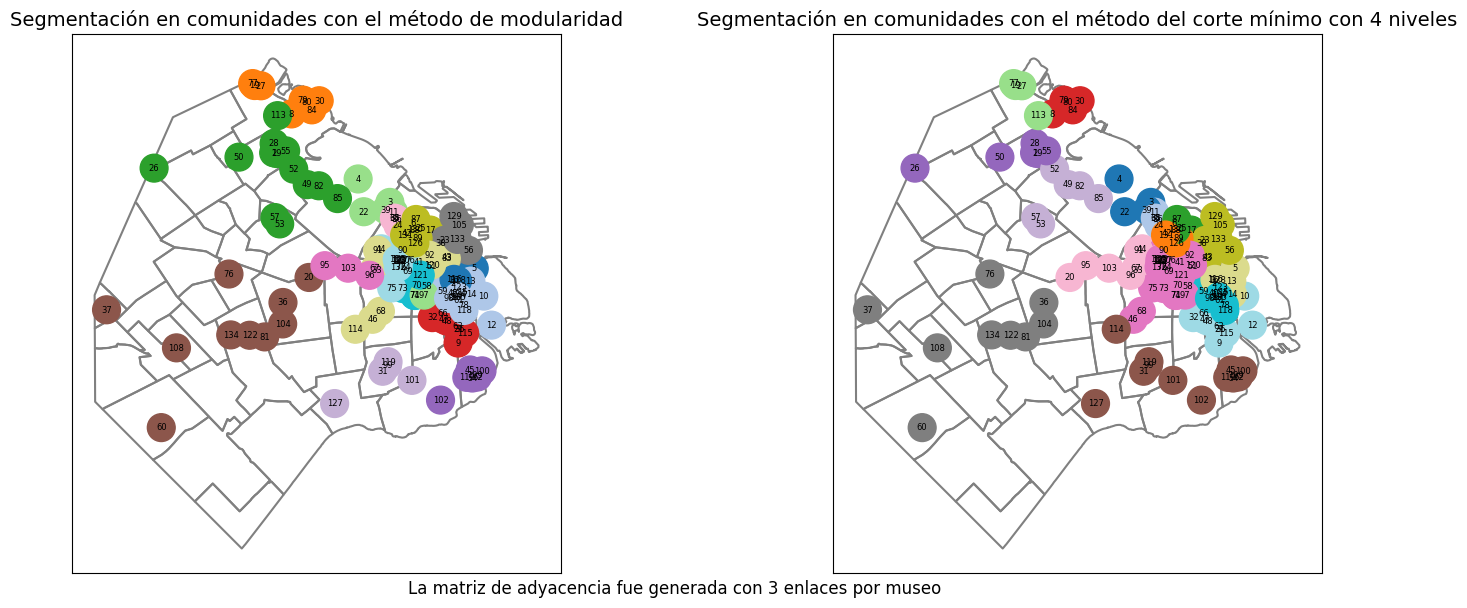



Las particiones con el método modularidad con m = 5 son [[20, 46, 68, 70, 73, 95, 96, 103, 121], [7, 33, 41, 44, 64, 67, 69, 72, 75, 90, 91, 93, 94, 106, 110, 111, 117, 125, 132], [23, 38, 105, 133], [6, 17, 24, 25, 42, 87, 88, 89, 126, 129, 130, 131], [31, 45, 54, 62, 99, 100, 101, 102, 109, 112, 114, 119, 127], [3, 11, 22, 34, 39, 43, 51, 58, 65, 71, 74, 83, 86, 92, 120], [8, 19, 27, 28, 30, 55, 77, 79, 80, 84, 113], [1, 4, 26, 29, 49, 50, 52, 53, 57, 82, 85], [36, 37, 60, 76, 81, 104, 108, 122, 134], [56], [9, 12, 21, 32, 35, 47, 48, 63, 66, 97, 115], [0, 2, 5, 10, 13, 14, 15, 16, 18, 40, 59, 61, 78, 98, 107, 116, 118, 123, 124, 128, 135]]
La distribución de cantidades de museos por cada partición es  [9, 19, 4, 12, 13, 15, 11, 11, 9, 1, 11, 21] 

Las particiones con el método corte mínimo con 3 cortes con m = 5 son [[1, 8, 19, 26, 27, 28, 29, 30, 50, 52, 53, 55, 57, 77, 79, 80, 84, 113], [20, 33, 36, 37, 44, 60, 67, 72, 75, 76, 81, 90, 91, 93, 94, 95, 96, 103, 104, 108, 110, 111,

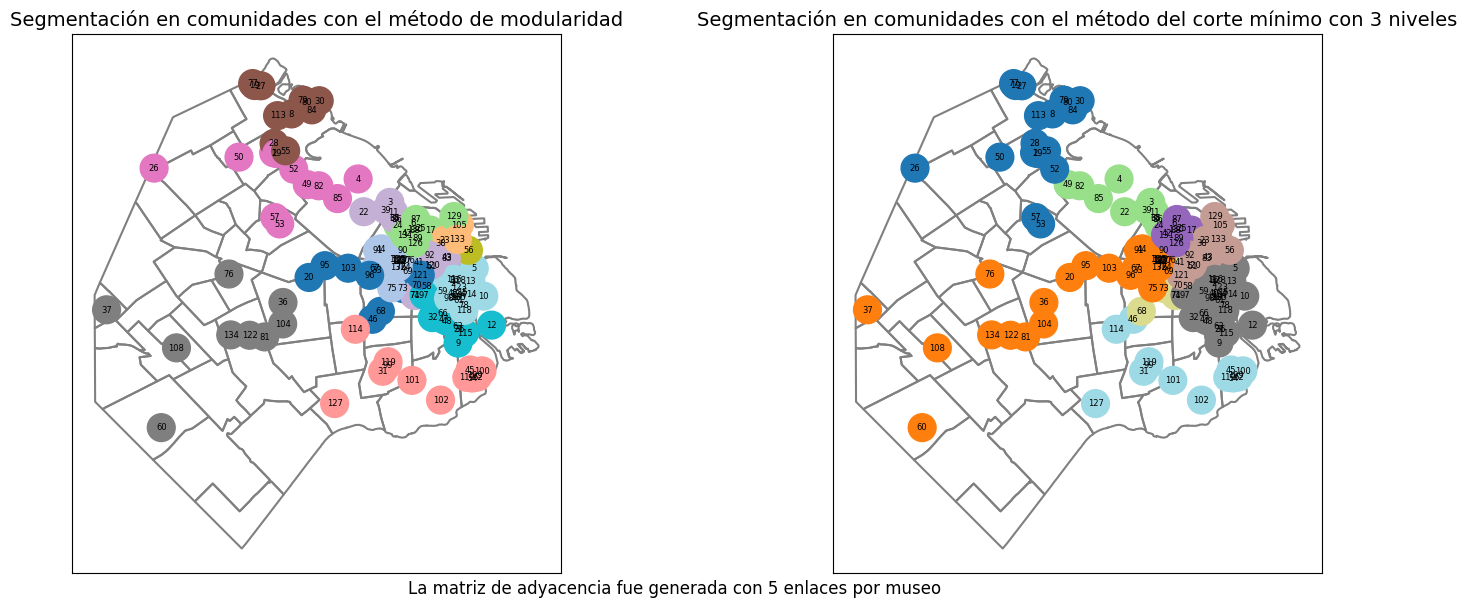



Las particiones con el método modularidad con m = 10 son [[3, 4, 6, 11, 17, 22, 23, 24, 25, 34, 38, 39, 42, 65, 85, 86, 87, 88, 89, 105, 126, 129, 130, 131], [1, 8, 19, 26, 27, 28, 29, 30, 36, 37, 49, 50, 52, 53, 55, 57, 60, 76, 77, 79, 80, 81, 82, 84, 108, 113, 122, 134], [20, 31, 46, 58, 68, 71, 74, 99, 104, 114, 119, 127], [92], [7, 33, 41, 44, 51, 64, 67, 69, 70, 72, 73, 75, 90, 91, 93, 94, 95, 96, 103, 106, 110, 111, 117, 120, 121, 125, 132], [9, 12, 21, 32, 35, 45, 47, 48, 54, 62, 63, 66, 100, 101, 102, 109, 112, 115], [0, 2, 5, 10, 13, 14, 15, 16, 18, 40, 43, 56, 59, 61, 78, 83, 97, 98, 107, 116, 118, 123, 124, 128, 133, 135]]
La distribución de cantidades de museos por cada partición es  [24, 28, 12, 1, 27, 18, 26] 

Las particiones con el método corte mínimo con 2 cortes con m = 10 son [[1, 8, 19, 20, 26, 27, 28, 29, 30, 33, 36, 37, 44, 49, 50, 52, 53, 55, 57, 60, 67, 76, 77, 79, 80, 81, 82, 84, 91, 95, 96, 103, 104, 108, 113, 122, 134], [3, 4, 6, 11, 17, 22, 24, 25, 34, 39,

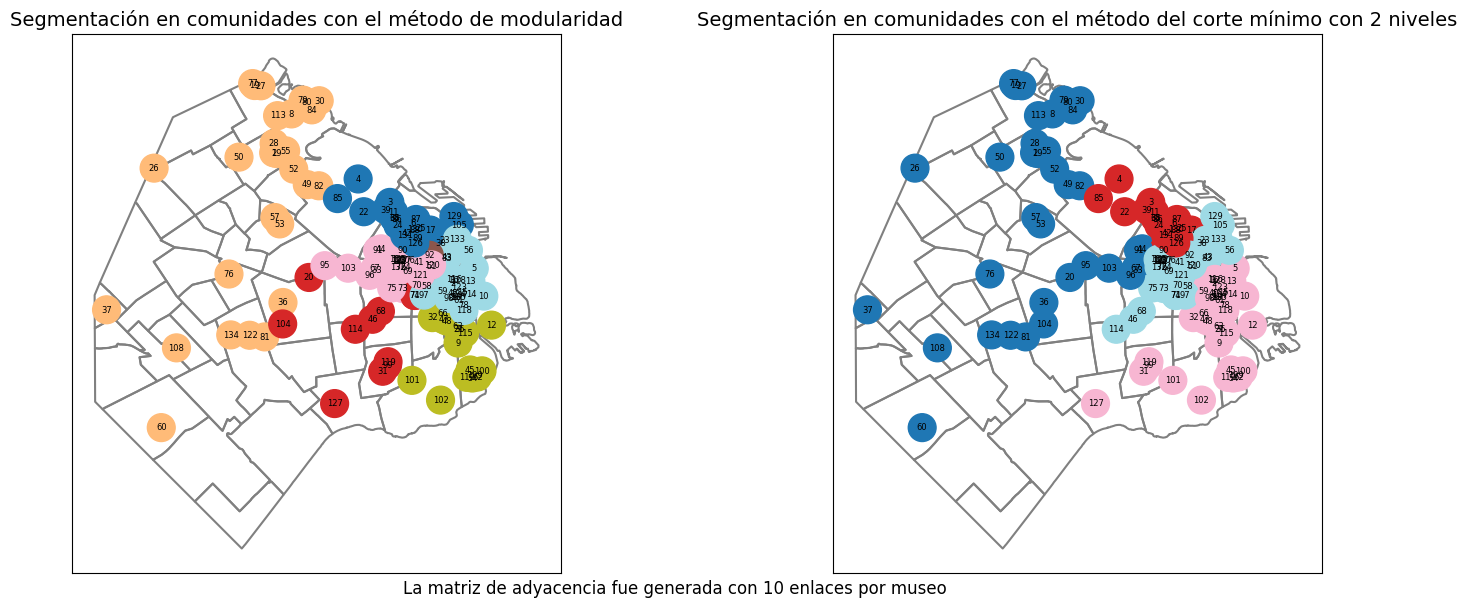



Las particiones con el método modularidad con m = 50 son [[1, 3, 4, 6, 7, 8, 11, 17, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 33, 34, 36, 37, 39, 42, 44, 49, 50, 52, 53, 55, 57, 60, 65, 67, 72, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 103, 104, 106, 108, 110, 111, 113, 117, 122, 125, 126, 129, 130, 131, 132, 134], [0, 2, 5, 9, 10, 12, 13, 14, 15, 16, 18, 21, 23, 31, 32, 35, 38, 40, 41, 43, 45, 46, 47, 48, 51, 54, 56, 58, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 73, 74, 75, 78, 83, 92, 97, 98, 99, 100, 101, 102, 105, 107, 109, 112, 114, 115, 116, 118, 119, 120, 121, 123, 124, 127, 128, 133, 135]]
La distribución de cantidades de museos por cada partición es  [69, 67] 

Las particiones con el método corte mínimo con 1 cortes con m = 50 son [[1, 3, 4, 6, 7, 8, 11, 17, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 33, 34, 36, 37, 39, 42, 44, 49, 50, 52, 53, 55, 57, 60, 65, 67, 72, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 103, 104,

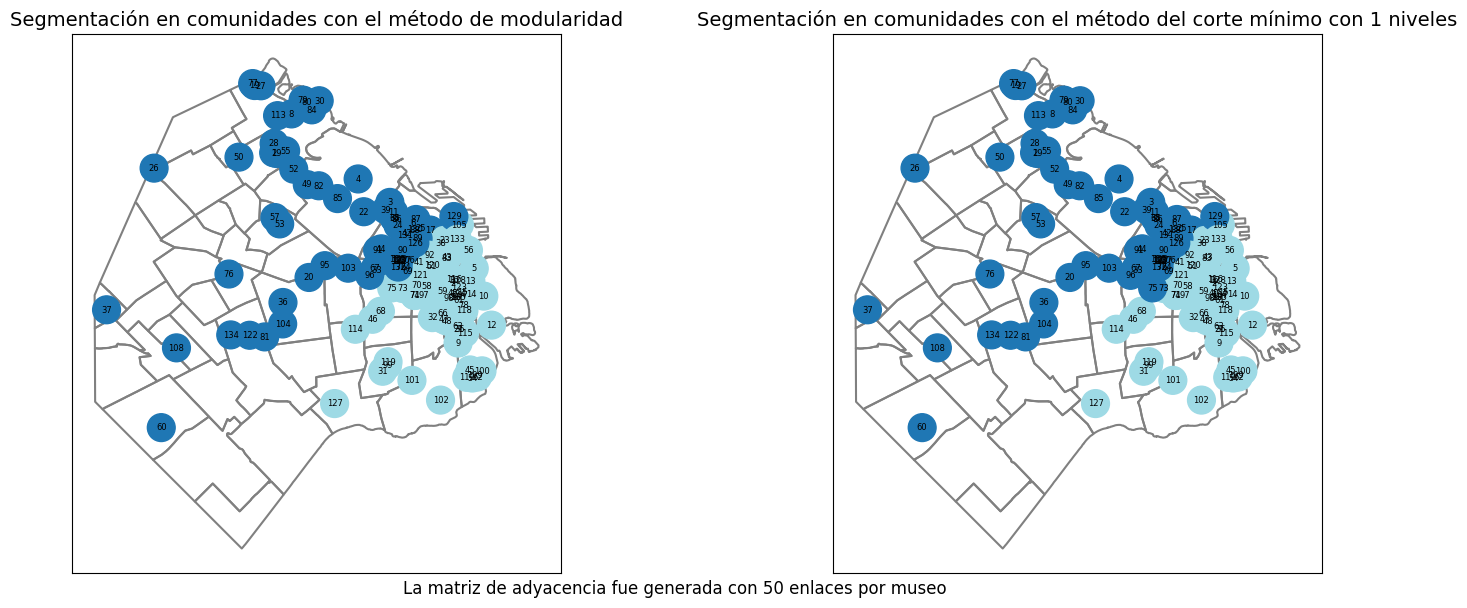

In [21]:
#En esta sección, visualizaremos las distintas comunidades segmentadas a partir de ambos métodos.
#Estas serán diferenciadas por colores.
#Utilizamos las funciones desarrolladas en el archivo de python template_funciones_2.py

#Seleccionamos cantidades de enlaces (m) de los museos
lista_m = [3,5,10,50]

for m in lista_m:
     #Construímos la matriz de adyacencia
     A = construye_adyacencia(D, m)
     #La simetrizamos
     A_simetrica = np.ceil(1/2*(A +A.T))

     #MODULARIDAD
     R = calcula_R(A_simetrica)
     segmentacion_con_modularidad = modularidad_iterativo(A_simetrica, R)
     #Visualizamos las distintas segmentaciones realizadas
     print(f'Las particiones con el método modularidad con m = {m} son {segmentacion_con_modularidad}')
     #Observamos la cantidad de museos que hay por segmento
     print(f'La distribución de cantidades de museos por cada partición es  {[len(segmentacion_con_modularidad[i]) for i in range(len(segmentacion_con_modularidad))]} \n')

     #LAPLACIANO
     #Como 'cantidad óptima de niveles', tomamos el logaritmo en base dos de la cantidad de comunidades generadas con el método de modularidad
     #Esto es pues por cada corte que se realiza a un conjunto, representa una bisección del mismo
     #Por lo tanto, si queremos generar una cantidad similar de grupos que obtuvo el método de modularidad, debemos aplicarle el logaritmo a este monto
     niveles_optimos_laplacianos = int(math.log2(len(segmentacion_con_modularidad)))
     segmentacion_con_laplaciano = laplaciano_iterativo(A_simetrica, niveles_optimos_laplacianos)
     #Visualizamos las distintas segmentaciones realizadas
     print(f'Las particiones con el método corte mínimo con {niveles_optimos_laplacianos} cortes con m = {m} son {segmentacion_con_laplaciano}')
     #Observamos la cantidad de museos que hay por segmento.
     print(f'La distribución de cantidades de museos por cada partición es  {[len(segmentacion_con_laplaciano[i]) for i in range(len(segmentacion_con_laplaciano))]} \n')

     #GRAFICAMOS DISPOSICIÓN DE COMUNIDADES EN BASE A AMBOS MÉTODOS
     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))  # Dos gráficos en fila
     graficar_comunidades(A,segmentacion_con_modularidad, ax[0])
     #Detalles de presentación
     ax[0].set_title("Segmentación en comunidades con el método de modularidad", fontsize=14)
     graficar_comunidades(A,segmentacion_con_laplaciano, ax[1])
     #Detalles de presentación
     ax[1].set_title(f"Segmentación en comunidades con el método del corte mínimo con {str(niveles_optimos_laplacianos)} niveles", fontsize=14)
     fig.text(0.5, 0.08, f'La matriz de adyacencia fue generada con {str(m)} enlaces por museo', ha='center', fontsize=12)
     plt.show()

     print('\n')

Es posible observar que, usando indistintamente cualquiera de los dos métodos de segmentación, el aumento de la cantidad de conexiones entre los nodos ($m$) al momento de la construcción de la matriz de adyacencia, genera un descenso en la cantidad de particiones realizadas en la red. Se percibe que, inicialmente, cuando $m = 3, \ $ se subdividió a la red en 16 grupos; en cambio, con $m = 50,\ $ hubo una (única) bisección.

En esta línea, a medida que aumenta la cantidad de conexiones, las comunidades formadas por ambos mecanismos son más similares entre sí. Es decir, los grupos formados tras la aplicación de los métodos presentan una mayor concordancia (mayor igualdad entre los conjuntos).

Adicionalmente, conforme se incrementa el número de conexiones, las comunidades poseen cantidades más balanceadas de museos en cada grupo. Es decir, que las particiones son más uniformes, equilibradas.

\

Por otra parte, resulta evidente que aquellas comunidades de mayores dimensiones (que abarcan mayor cantidad de entidades) suelen formarse a partir de los museos que se encuentran por fuera de la metrópolis. Dicho en otras palabras, los que no se encuentran en polos de gran aglomeración de museos.

Paralelamente, los sectores donde más cantidad de comunidades se generan (donde se produce la mayor cantidad de subdivisiones) son en aquellos focos centrales o de alta densidad/concentración de museos.





## Punto 5:

Luego de realizar este extenso análisis sobre la red de museos en la Ciudad Autónoma de Buenos Aires, hemos identificado ciertos patrones que merecen ser destacados. Estos hallazgos ofrecen información valiosa sobre la distribución y conexión de los museos en la región.

En primer lugar, observamos que la distribución de los museos no es homogénea en todos los barrios, lo que impacta directamente en los valores obtenidos de PageRank y en la detección de comunidades mediante métodos espectrales como el Laplaciano y la Modularidad. Particularmente, los museos ubicados en la zona Este de la ciudad tienden a concentrar mayor PageRank pues son focos que atraen muchas conexiones (enlaces); pero a la vez distinguimos que la interconexión es más débil, por la gran diversificación de la procedencia de estos mismos enlaces, lo que genera que no se formen grupos tan sólidos como aquellos por fuera del foco (que, por el contrario, reciben menor cantidad de enlaces; lo que también tiende a un nivel inferior de popularidad). Además, notamos que la ubicación de los museos parece estar influenciada por la transitividad de los barrios.

Un hallazgo interesante fue ver cómo el número de conexiones que consideramos afecta lo que observamos. Desde un punto de vista analítico, se pueden extraer dos conclusiones principales:

* Relación entre concentración y PageRank: los museos con mayor PageRank están ubicados en la zona Este de CABA, reflejo de una mayor concentración y conectividad en la red. En términos de clustering, cuando la cantidad de conexiones consideradas ($m$) es baja, observamos una distribución más fragmentada en grupos pequeños. En contraste, en las zonas periféricas, con menor densidad de museos, las comunidades suelen ser más amplias e incluyen mayor cantidad de entidades.

* Impacto de la conectividad en la estructura de comunidades: a medida que aumenta la cantidad de enlaces entre museos ($m$), los valores de PageRank tienden a estabilizarse, convergiendo hacia un equilibrio. Paralelamente, el nivel de segmentación es menor pues ocurre un fortalecimiento de las interconexiones entre los distintos sectores, lo que resulta en menor cantidad de particiones, y grupos de mayores dimensiones.


Lo más valioso fue comprobar que, aunque cada museo es único, en conjunto forman un sistema donde la ubicación crea patrones que podemos medir y analizar matemáticamente. No obstante, entendemos que simplemente tomando estos conjuntos de parámetros y métodos, no se describe de forma exacta la realidad (y que, en la práctica, es una tarea casi imposible), pero sirve para visualizar la propensión o tendencia natural de los visitantes de dirigirse a aquellos polos más concentrados; o cómo el azar es una variable díficil de predecir, pero importante a tener en cuenta en la evaluación de cada sistema.